<a href="https://colab.research.google.com/github/athirajoshy/firstrepository/blob/master/Transfer_Learning_Resnet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please download the dataset from the below url

In [ ]:
!pip install -q keras

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)#keep this code as version is above 2.0

2.3.0


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')#default path of google drive 
#press enter after copying

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]#w,h by default this value #resnet default size#we can change this 

train_path = '/content/drive/My Drive/cars'
valid_path = '/content/drive/My Drive/Datasets/Datasets/Test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#[3]is added to make it as rgb channel
#in resnet output is of 1000 categories,we dont need the first and last so include_top=False


94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/cars/*')
folders
#get sub folders

['/content/drive/My Drive/cars/audi',
 '/content/drive/My Drive/cars/mercedes',
 '/content/drive/My Drive/cars/lamborghini']

In [ ]:
#output from resnet is flattened
x = Flatten()(resnet.output)#to get final out

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,#tilt
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/cars',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 740 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
24/24 [==============================] - 311s 13s/step - loss: 4.4126 - accuracy: 0.3651 - val_loss: 2.1796 - val_accuracy: 0.5690
Epoch 2/50
24/24 [==============================] - 9s 361ms/step - loss: 1.4731 - accuracy: 0.4867 - val_loss: 0.9715 - val_accuracy: 0.5690
Epoch 3/50
24/24 [==============================] - 9s 354ms/step - loss: 1.0504 - accuracy: 0.5096 - val_loss: 1.1308 - val_accuracy: 0.6034
Epoch 4/50
24/24 [==============================] - 9s 353ms/step - loss: 1.5774 - accuracy: 0.4546 - val_loss: 2.0736 - val_accuracy: 0.5690
Epoch 5/50
24/24 [==============================] - 9s 354ms/step - loss: 1.5189 - accuracy: 0.4998 - val_loss: 1.0647 - val_accuracy: 0.5000
Epoch 6/50
24/24 [==============================] - 9s 368ms/step - loss: 1.0684 - accuracy: 0.5317 - val_loss: 1.0050 - val_accuracy: 0.6034
Epoch 7/50
24/24 [==============================] - 9s 354ms/step - loss: 0.8722 - accuracy: 0.6074 - val_loss: 1.3819 - val_accuracy: 0.5517
Epoch 

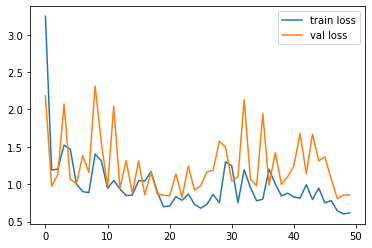

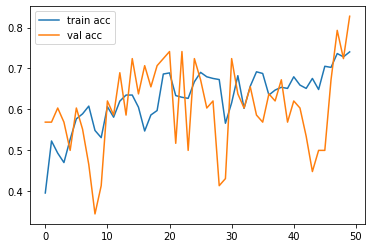

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet_cars50.hdf5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred #prob based on 3 classes

array([[2.8256798e-04, 3.3158156e-01, 6.6813588e-01],
       [8.8245288e-05, 9.8810065e-01, 1.1811104e-02],
       [3.9396277e-01, 2.8493506e-01, 3.2110220e-01],
       [3.2363772e-01, 1.9387786e-01, 4.8248446e-01],
       [3.6963290e-03, 9.2578208e-01, 7.0521593e-02],
       [1.5565180e-03, 7.6301330e-01, 2.3543021e-01],
       [7.7809091e-04, 7.8359377e-01, 2.1562809e-01],
       [4.1028507e-02, 9.4296634e-01, 1.6005062e-02],
       [2.4057074e-01, 5.5393040e-01, 2.0549884e-01],
       [2.6886061e-01, 1.3039040e-02, 7.1810031e-01],
       [7.0153594e-01, 2.7349171e-01, 2.4972357e-02],
       [3.5016122e-01, 1.4221205e-01, 5.0762671e-01],
       [6.6638432e-02, 9.1584951e-01, 1.7512109e-02],
       [8.9582542e-08, 9.9985898e-01, 1.4085486e-04],
       [5.9493876e-04, 9.0008676e-01, 9.9318266e-02],
       [2.7590096e-01, 5.9217072e-01, 1.3192829e-01],
       [4.3171467e-04, 9.5236140e-01, 4.7206786e-02],
       [1.1188447e-01, 7.0924997e-01, 1.7886558e-01],
       [3.3267101e-04, 9.219

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
#also use predict_classes

In [ ]:
y_pred

array([2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet_cars50.hdf5')

In [ ]:
img=image.load_img('/content/drive/My Drive/Datasets/Datasets/Test/audi/26.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        ...,
        [ 34.,  44.,  54.],
        [ 34.,  44.,  54.],
        [ 34.,  44.,  54.]],

       [[ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        ...,
        [ 23.,  33.,  43.],
        [ 23.,  33.,  43.],
        [ 23.,  33.,  43.]],

       [[ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        ...,
        [ 18.,  28.,  38.],
        [ 18.,  28.,  38.],
        [ 18.,  28.,  38.]],

       ...,

       [[228., 223., 220.],
        [228., 223., 220.],
        [228., 223., 220.],
        ...,
        [239., 239., 241.],
        [239., 239., 241.],
        [239., 239., 241.]],

       [[227., 222., 219.],
        [227., 222., 219.],
        [227., 222., 219.],
        ...,
        [238., 238., 240.],
        [238., 238., 240.],
        [238., 238., 240.]],

       [[228., 223., 220.],
        [228., 223., 220.],
        [228., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255#correct pixel strutcture of image

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)#prob of 3 channel as rgb channel
#grey and b and w=2 values array

array([[4.6217147e-22, 1.0000000e+00, 1.7872808e-09]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data),axis=1)
a#ccording to folder order

array([1])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#STREAMLIT
!pip install streamlit 

     |████████████████████████████████| 7.4MB 6.5MB/s 
     |████████████████████████████████| 112kB 42.4MB/s 
     |████████████████████████████████| 133kB 33.5MB/s 
     |████████████████████████████████| 4.4MB 37.5MB/s 
     |████████████████████████████████| 6.7MB 36.6MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 122kB 42.8MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=159b38b25dd6d1dded308ddf0840d86e8e44abd5e66a749edd7c604021733a55
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=161d2dd85fab351e84ae9d808a7b29514c8df342bd38a710b1c8506e8fc8f558
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for pathtools: fil

In [ ]:
!pip install pyngrok

  Created wheel for pyngrok: filename=pyngrok-5.0.1-cp36-none-any.whl size=18822 sha256=12fa538c6f904cc2cf22d324b8817cc52f023b46be733b8aac5bd1d8e22d27e8
  Stored in directory: /root/.cache/pip/wheels/94/01/05/d39efb8f6b40a411354b4168ca9dda99e6f8d586e458e97551
Successfully built pyngrok
ERROR: Operation cancelled by user


In [ ]:
#tf.keras.models.save_model(model,'model_resnet50.hdf5')#h5
%%writefile app.py
import streamlit as st
import tensorflow as tf 
st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/model_resnet50.hdf5') #'/content/model_
  return model

model=load_model()
st.write("""
          # car classification
          """
          )
file=st.file_uploader("please upload a car image",type=['jpg','png'])
import cv2
from PIL import Image,ImageOps
import numpy as np  
def import_and_predict(image_data,model):
  size=(224,224)
  img=ImageOps.fit(image_data,size,Image.ANTIALIAS)
  img=np.asarray(image)
  img_reshape=img[np.newaxis,...]
  prediction=model.predict(img_reshape)
  return prediction
if file is None:
  st.text('please upload an image')
else:
  st.text('please upload an image')
else:
  Image=Image.open(file) 
  st.image(image,use_column_width=True)
  predictions=import_and_predict(image,model) 
  class_names=['Audi','mercedes','Lamborghini']
  strings='this is most likely:'+class_names[np.argmax(predictions)]
  st.success(strings)

Writing app.py


In [ ]:
def import_and_predict(image_data,model):
  size=(224,224)
  img=ImageOps.fit(image_data,size,Image.ANTIALIAS)
  img=np.asarray(image)
  img_reshape=img[np.newaxis,...]
  prediction=model.predict(img_reshape)
  return prediction
if file is None:
  st.text('please upload an image')
else:
  st.text('please upload an image')
else:
  Image=Image.open(file) 
  st.image(image,use_column_width=True)
  predictions=import_and_predict(image,model) 
  class_names=['Audi','mercedes','Lamborghini']
  strings='this is most likely:'+class_names[np.argmax(predictions)]
  st.success(string)
    


In [ ]:
!ngrok authtoken 1iYaaAmJRIChwFn72qKNz8JNwyT_2NwosRR6Vvm4XGhrL5dVR

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py

nohup: ignoring input and appending output to 'nohup.out'
1iYaaAmJRIChwFn72qKNz8JNwyT_2NwosRR6Vvm4XGhrL5dVR


In [ ]:
!cat /content/nohup.out

In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

'http://69023f3d8882.ngrok.io'

In [ ]:
#flask code

!pip install flask-ngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask
app=Flask(__name__)
run_with_ngrok(app)
@app.route("/")
def index():
  return"<h1>hello colab</h1>"
app.run()  

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://b8528942f88d.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [21/Jan/2021 01:10:00] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Jan/2021 01:10:01] "GET /favicon.ico HTTP/1.1" 404 -
